# Libraries For Data Exploration 

In [16]:
# importing pandas as pd
import pandas as pd
 
# importing numpy as np
import numpy as np

# importing numpy as np
import matplotlib.pyplot as plt


# Load dataset

In [17]:
# making data frame from csv file
# df => data-frame 
df = pd.read_csv("CoffeeBeans.csv")

In [84]:
df.shape

(237, 14)

In [116]:
# 1. Iterate on each attribute (Column) and check the null values
# 2. Sum all the null/missing values for each attribute 
# 3. display missing values sumtion in front of each attribute
df.isna().sum()

Variety           0
Shape             0
Sieve             0
Aroma             0
Flavor            0
Aftertaste        0
Acidity           0
Body              0
Uniformity        0
Balance           0
clean cup         0
Sweetness         0
Taster´s score    0
Final score       0
dtype: int64

In [117]:
#Total number of null/missing values in the whole df 
df.isna().sum().sum()

0

# Boxplot and Outliers detection

In [118]:
#define a function called " plot_boxplot " to visualize outliers
def plot_boxplot ( df , at ):
   df.boxplot ( column = [ at ] )
   plt.grid ( False )
   plt.show ( )

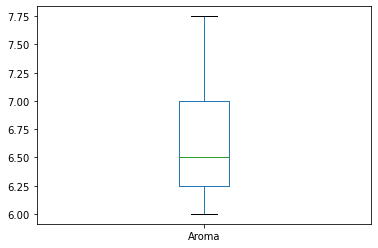

In [119]:
plot_boxplot(df, "Aroma")

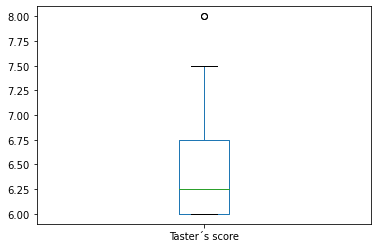

In [123]:
plot_boxplot(df, "Taster´s score")

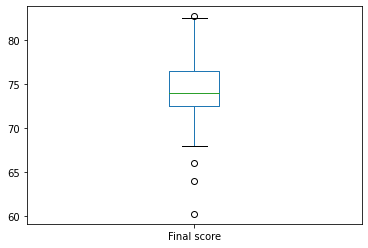

In [128]:
plot_boxplot(df, "Final score")

In [37]:
#i. Defining a function that access 1 column at a time
#ii. Store its values in a list
#iii. Sort it as [min,max]; Ascending order
#iv. Then, return it
def sorted_col(col_name):
    col_data = df.loc[:,col_name]
    sorted(col_data)
    return col_data

In [38]:
#Defining a function that returns q1, q3
def q3_q1(col_data):
    #Finding 1st quartile and 3rd quartile
    q1, q3 = np.percentile(col_data,[25,75])
    #Return q1, q3 values
    return q1, q3

In [39]:
#Defining a function that returns the difference between 3rd and 1st quartile
def IQR(col_data):
    q1, q3 = q3_q1(col_data)
    #Finding the IQR which is the difference between 3rd and 1st quartile
    IQR = q3 - q1
    #Return IQR value
    return IQR

In [47]:
#Defining a function that returns the lower and upper bounds
def lower_uper(col_data):
    q1, q3 = q3_q1(col_data)
    IQR_value = IQR(col_data)
    #Finding lower and upper bound
    lower_bound = q1 -(1.5 * IQR_value) 
    upper_bound = q3 +(1.5 * IQR_value) 
    #Print lower_bound, upper_bound value
    return lower_bound, upper_bound

In [48]:
#TEST
Aroma_data = sorted_col("Sweetness")
index = lower_uper(Aroma_data)
index

Int64Index([  2,   3,   6,  46,  80,  98, 109, 112, 113, 130, 154, 160, 181,
            182, 191, 192, 193, 194, 195, 196, 197, 198, 200, 234, 235],
           dtype='int64')

In [38]:
#Defining a function that returns the min and mix values of a column
def min_max_col(col_data):
    col_min = min(col_data)
    col_max = max(col_data)
    return col_min, col_max

In [60]:
#Aroma
Aroma_data = sorted_col("Aroma")
Aroma_lower, Aroma_upper = lower_uper(Aroma_data)
Aroma_min, Aroma_max = min_max_col(Aroma_data)
outliers_boundary = ' , '.join(["[" + str(Aroma_lower) , str(Aroma_upper) +"]"])
print (outliers_boundary)
#Aroma -> lower_bound is 5.125 and upper bound is 8.125
#Thus anything outside [5.125, 8.125] is an outlier
Aroma_boundary = ' , '.join(["[" + str(Aroma_min) , str(Aroma_max) +"]"])
print (Aroma_boundary)
#Aroma_min -> 6.0, Aroma_max -> 7.75 => [6.0, 7.75]
#Thus, no outlier is found in "Aroma" Column 

[5.125 , 8.125]
[6.0 , 7.75]


In [79]:
#Defining a function finds [lower, upper] and [min, max] per column 
def col_outliers_boundaries(col_name):
    col_data = sorted_col(col_name)
    col_lower, col_upper = lower_uper(col_data)
    col_min, col_max = min_max_col(col_data)
    col_outliers = ' , '.join(["[" + str(col_lower) , str(col_upper) +"]"])
    col_boundary = ' , '.join(["[" + str(col_min) , str(col_max) +"]"])
    return col_outliers, col_boundary

In [94]:
#Defining a function prints column's Outliers and Boundaries
def print_outliers_boundaries(col_outliers, col_boundary):
    print ("Outliers_Boundaries   =>  " + col_outliers) 
    print ("Attribute_Boundaries  =>  " + col_boundary)

In [95]:
#Aroma   
Aroma_outliers, Aroma_boundaries = col_outliers_boundaries("Aroma")
print_outliers_boundaries(Aroma_outliers, Aroma_boundaries)
#Aroma -> lower_bound is 5.125 and upper bound is 8.125
#Thus anything outside [5.125, 8.125] is an outlier
#Aroma_min -> 6.0, Aroma_max -> 7.75 => [6.0, 7.75]
#Thus, no outlier is found in "Aroma" Column

Outliers    =>  [5.125 , 8.125]
Boundaries  =>  [6.0 , 7.75]


In [96]:
#Flavor    
Flavor_outliers, Flavor_boundaries = col_outliers_boundaries("Flavor")
print_outliers_boundaries(Flavor_outliers, Flavor_boundaries)
#Aroma -> lower_bound is 5.125 and upper bound is 8.125
#Thus anything outside [5.125, 8.125] is an outlier
#Aroma_min -> 6.0, Aroma_max -> 7.75 => [6.0, 7.75]
#Thus, no outlier is found in "Aroma" Column

Outliers    =>  [4.875 , 7.875]
Boundaries  =>  [6.0 , 7.75]


In [97]:
#Aftertaste   
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("Aftertaste")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries) 

Outliers    =>  [4.875 , 7.875]
Boundaries  =>  [6.0 , 7.5]


In [98]:
#Acidity         
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("Acidity")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries) 

Outliers    =>  [4.875 , 7.875]
Boundaries  =>  [6.0 , 7.75]


In [100]:
#Body      
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("Body")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries) 
#Illustrate why we have outliers here
#Show a visualization also

Outliers    =>  [5.25 , 7.25]
Boundaries  =>  [6.0 , 10.0]


In [102]:
#Uniformity     
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("Uniformity")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries)

Outliers    =>  [10.0 , 10.0]
Boundaries  =>  [1.0 , 10.0]


In [103]:
#Balance   
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("Balance")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries)

Outliers    =>  [5.25 , 7.25]
Boundaries  =>  [6.0 , 10.0]


In [104]:
#clean cup        
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("clean cup")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries)

Outliers    =>  [10.0 , 10.0]
Boundaries  =>  [4.0 , 10.0]


In [105]:
#Sweetness        
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("Sweetness")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries)

Outliers    =>  [10.0 , 10.0]
Boundaries  =>  [6.0 , 10.0]


In [106]:
#Taster´s score 
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("Taster´s score")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries)

Outliers    =>  [4.875 , 7.875]
Boundaries  =>  [6.0 , 8.0]


In [107]:
#Final score
Aftertaste_outliers, Aftertaste_boundaries = col_outliers_boundaries("Final score")
print_outliers_boundaries(Aftertaste_outliers, Aftertaste_boundaries)
#Final score -> lower_bound is 66.5 and upper bound is 82.5
#Thus anything outside  [66.5 , 82.5] is an outlier
#FinalScore_min -> 60.25, FinalScore_max -> 82.75 => [60.25 , 82.75]
#Thus, there are outliers are found in "Final score" Feature

Outliers    =>  [66.5 , 82.5]
Boundaries  =>  [60.25 , 82.75]


# Remove Outliers

In [97]:
index_list = []

In [96]:
# define a function called "outliers" which returns a List of index of outliers
# IQR = Q3-Q1
# +/- 1.5*IQR
def outliers_Body():
    Q1 = df["Body"].quantile(0.25)
    Q3 = df["Body"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df["Body"] < lower_bound) | (df["Body"] > upper_bound) ]

    return ls


In [111]:
def outliers_Uniformity():
    Q1 = df["Uniformity"].quantile(0.25)
    Q3 = df["Uniformity"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df["Uniformity"] < lower_bound) | (df["Uniformity"] > upper_bound) ]

    return ls

In [112]:
def outliers_Balance():
    Q1 = df["Balance"].quantile(0.25)
    Q3 = df["Balance"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df["Balance"] < lower_bound) | (df["Balance"] > upper_bound) ]

    return ls

In [113]:
def outliers_cleanCup():
    Q1 = df["clean cup"].quantile(0.25)
    Q3 = df["clean cup"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df["clean cup"] < lower_bound) | (df["clean cup"] > upper_bound) ]

    return ls

In [114]:
def outliers_Sweetness():
    Q1 = df["Sweetness"].quantile(0.25)
    Q3 = df["Sweetness"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df["Sweetness"] < lower_bound) | (df["Sweetness"] > upper_bound) ]

    return ls

In [115]:
def outliers_TasterScore():
    Q1 = df["Taster´s score"].quantile(0.25)
    Q3 = df["Taster´s score"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df["Taster´s score"] < lower_bound) | (df["Taster´s score"] > upper_bound) ]

    return ls

In [116]:
def outliers_FinalScore():
    Q1 = df["Final score"].quantile(0.25)
    Q3 = df["Final score"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df["Final score"] < lower_bound) | (df["Final score"] > upper_bound) ]

    return ls

In [142]:

#index_list.extend(outliers_FinalScore())
#Remove duplicates first
index_list = [*set(index_list)]
len(index_list)
#88,105,117?,149,151,155

55

In [140]:
# define a function called "remove" 
# which returns a cleaned dataframe without outliers
# df => dataframe
# ls => output of indices from multiple columns
def remove (df, ls):
    ls = sorted(set (ls))
    df = df.drop(ls)
    return df

In [127]:
df_cleaned = remove(df, index_list)

In [130]:
#After removing the outliers
df_cleaned.shape

(182, 14)

In [134]:
df.shape

(237, 14)

In [ ]:
#check for outliers for each feature that has outlier(s)
plot_boxplot(df_cleaned,'')

In [133]:
#create new cleaned dataset
df_cleaned.to_csv('CoffeeBeansCleaned.csv', index = False)

# 1st algorithm : SVM

# 2ed Algorithm : 